# Experiment 1. Summary.
Overview of progress in experiment 1.

## Purpose
Investigate to what extent popular image classification neural networks can "see" _contextual colors_.

### Define "see"
For now, this is limited to testing whether a neural network keeps or 
loses the sufficient information as it passed through the network. Sufficient 
information to distinguish  contextual colors.

## What are contextual colors?
Gray-white and brown-orange are two examples of color transitions that can occur 
without the RGB color of the area itself changing. Our minds create a "color" 
experience that depends not only on the light from an object, but also light 
from the object's surroundings. This phenomenon arises due to the human brain using some colors to characterize the reflectance properties of objects, and to do so,
the spectral information of the light coming from the object _and_ the light
illuminating the object must be considered. Colors that can't be experienced is isolation
are considered _contextual colors_. Mark Fairchild calls them _related colors_.

An interesting aspect of contextual colors is that they can't be observed as 
light sources. Why? Light sources appear as the brightest _local_ object, so 
they always establish themselves as a local maximum brightness. Contextual colors can only be experienced if the object has a 
brightness less than the local maximum brightness. A famous example is brown; 
Fairchild describes in Color Appearance Models how Guinness tried and failed 
to create a brown neon light. Another example I have noticed is the Fukutoshin 
subway line in Tokyo: it's designated color is brown, however, signs for the 
subway line often appear orange and even sometimes a purple color. Brown is 
a very interesting color, as different shades of brown can transition to
orange, red, yellow and even purple as surrounding light changes.

## Orange vs. brown
Orange and brown are related colors: an area of a screen that appears orange can be made to appear brown by increasing the brightness of the surrounding pixels. 
A number of studies have singled out brown for research. Most of these have investigated a brown-yellow transition. I have found the brown-orange transition
to have a sharper transition, which is why I've chosen to go with orange rather than yellow. The colors that can be transitioned to from brown by changing surrounding illumination have labels that appear in everyday language: orange, red, yellow and purple (eggplant purple). In this regard, these transitions are special. As the hue moves towards green and then blue, we see other contextual colors like khaki, teal and cobalt. These colors are not as common in everyday language, and, for me at least, I find it harder to classify them. Brown and orange being easily identifiable colors with a relatively sharp transition is why I chose them to study.

Below is a demo of how changing the background brightness can cause a brown-orange transition. The effect will be most obvious viewed fullscreen in a dark environment.

<video controls loop=true>
    <srouce src="./resources/exp_1_1/orange_brown_transition.mp4"/>
</video>

## Experiments 1
List of experiments so far.

### Experiment 1.1
Here I created a  dataset, from the following setup:

<!--<img src="attachment:e9ca5167-d616-4b61-8f2d-422a445fda0a.jpg" width="600px" />-->

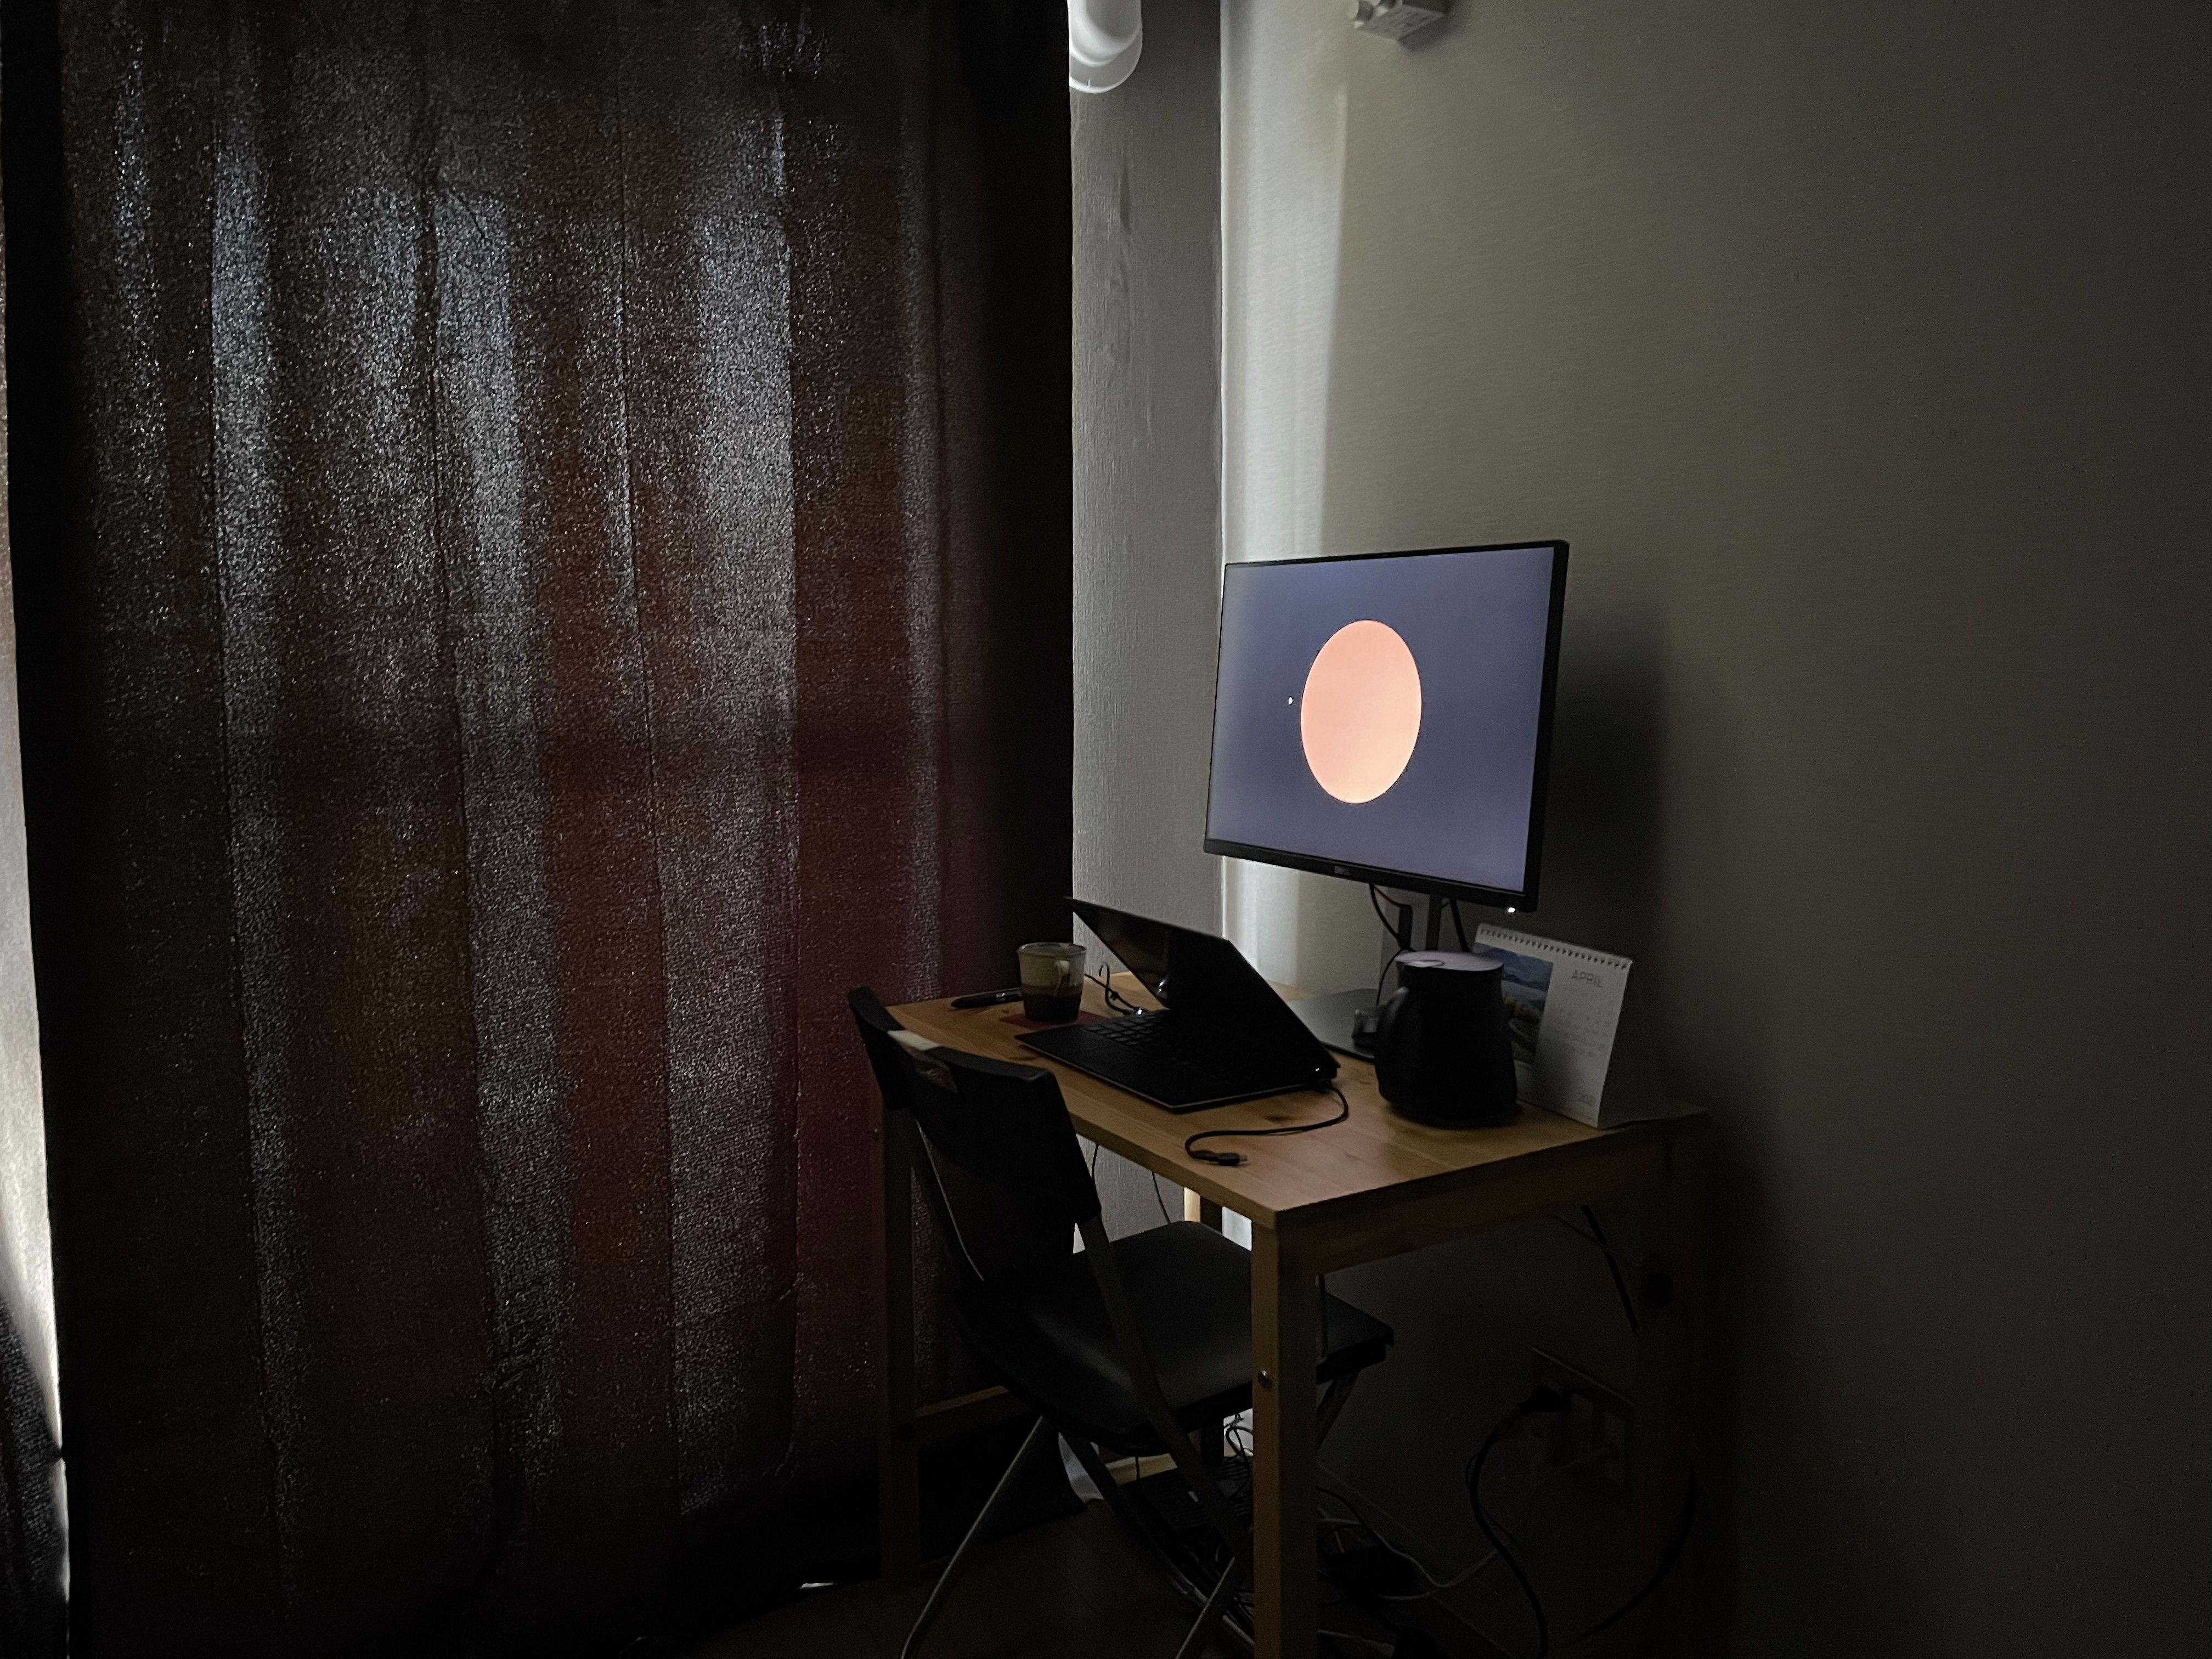

The data was use to confirm that humans (or me, at least) require relative brightness in order to distinguish orange and brown.

The data looks like:

|  Answer  |  Circle Color    |  Background Color      |
| -------- | ---------------- | ---------------------- |
|  0  |  \[0.81, 0.75, 0.28\]   |  \[0.25, 0.25, 0.25\]  |
|  3  |  \[0.12, 0.15, 0.34\]   |  \[0.50, 0.50, 0.50\]     |
|  1  |  \[0.54, 0.23, 0.10\]  |  \[0.91, 0.91, 0.91\]  |
|  2  |  \[0.84, 0.19, 0.29\]   |  \[0.85, 0.85, 0.85\]  |
|  1  |  \[0.87, 0.34, 0.20\]   |  \[0.94, 0.94, 0.94\]  |
|  0  |  \[0.43, 0.43, 0.72\]  |  \[0.31, 0.31, 0.31\]  |

Where elements in the "Answer" represent my choice as follows:

| Answer | Meaning |
| ------ | --------|
| 0| orange   |
|1| brown  |
|2| both  |
|3| neither|  


The following breakdown of the data highlights that we have captured the phenomenon whereby orange transitions to brown by the varying of the background brightness.

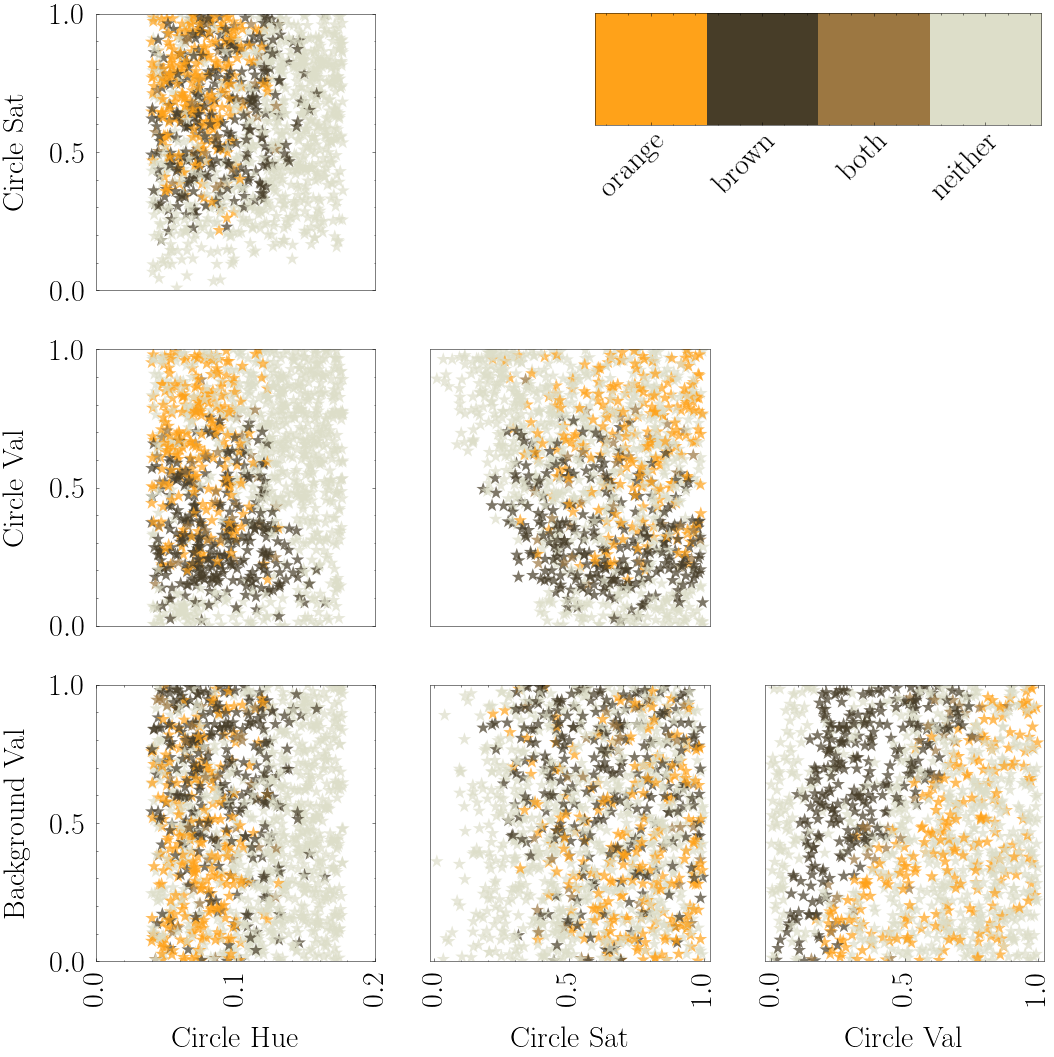


### Experiment 1.2
I noticed that the Imagenet dataset has 1 pair of classes (lemon, orange) whose classification, if done by humans, would probably rely very heavily on the color. I downloaded a picture of a lemon, photoshopped it to look orange, and asked a pre-trained network to classify it. This experiment is a bit out of place compared to the other experiments.

## Lemon to orange
Original lemon image:
<div>
    <!--<img src="resources/lemons/1/lemon_centered_padded.jpg" width="300px"/>-->
    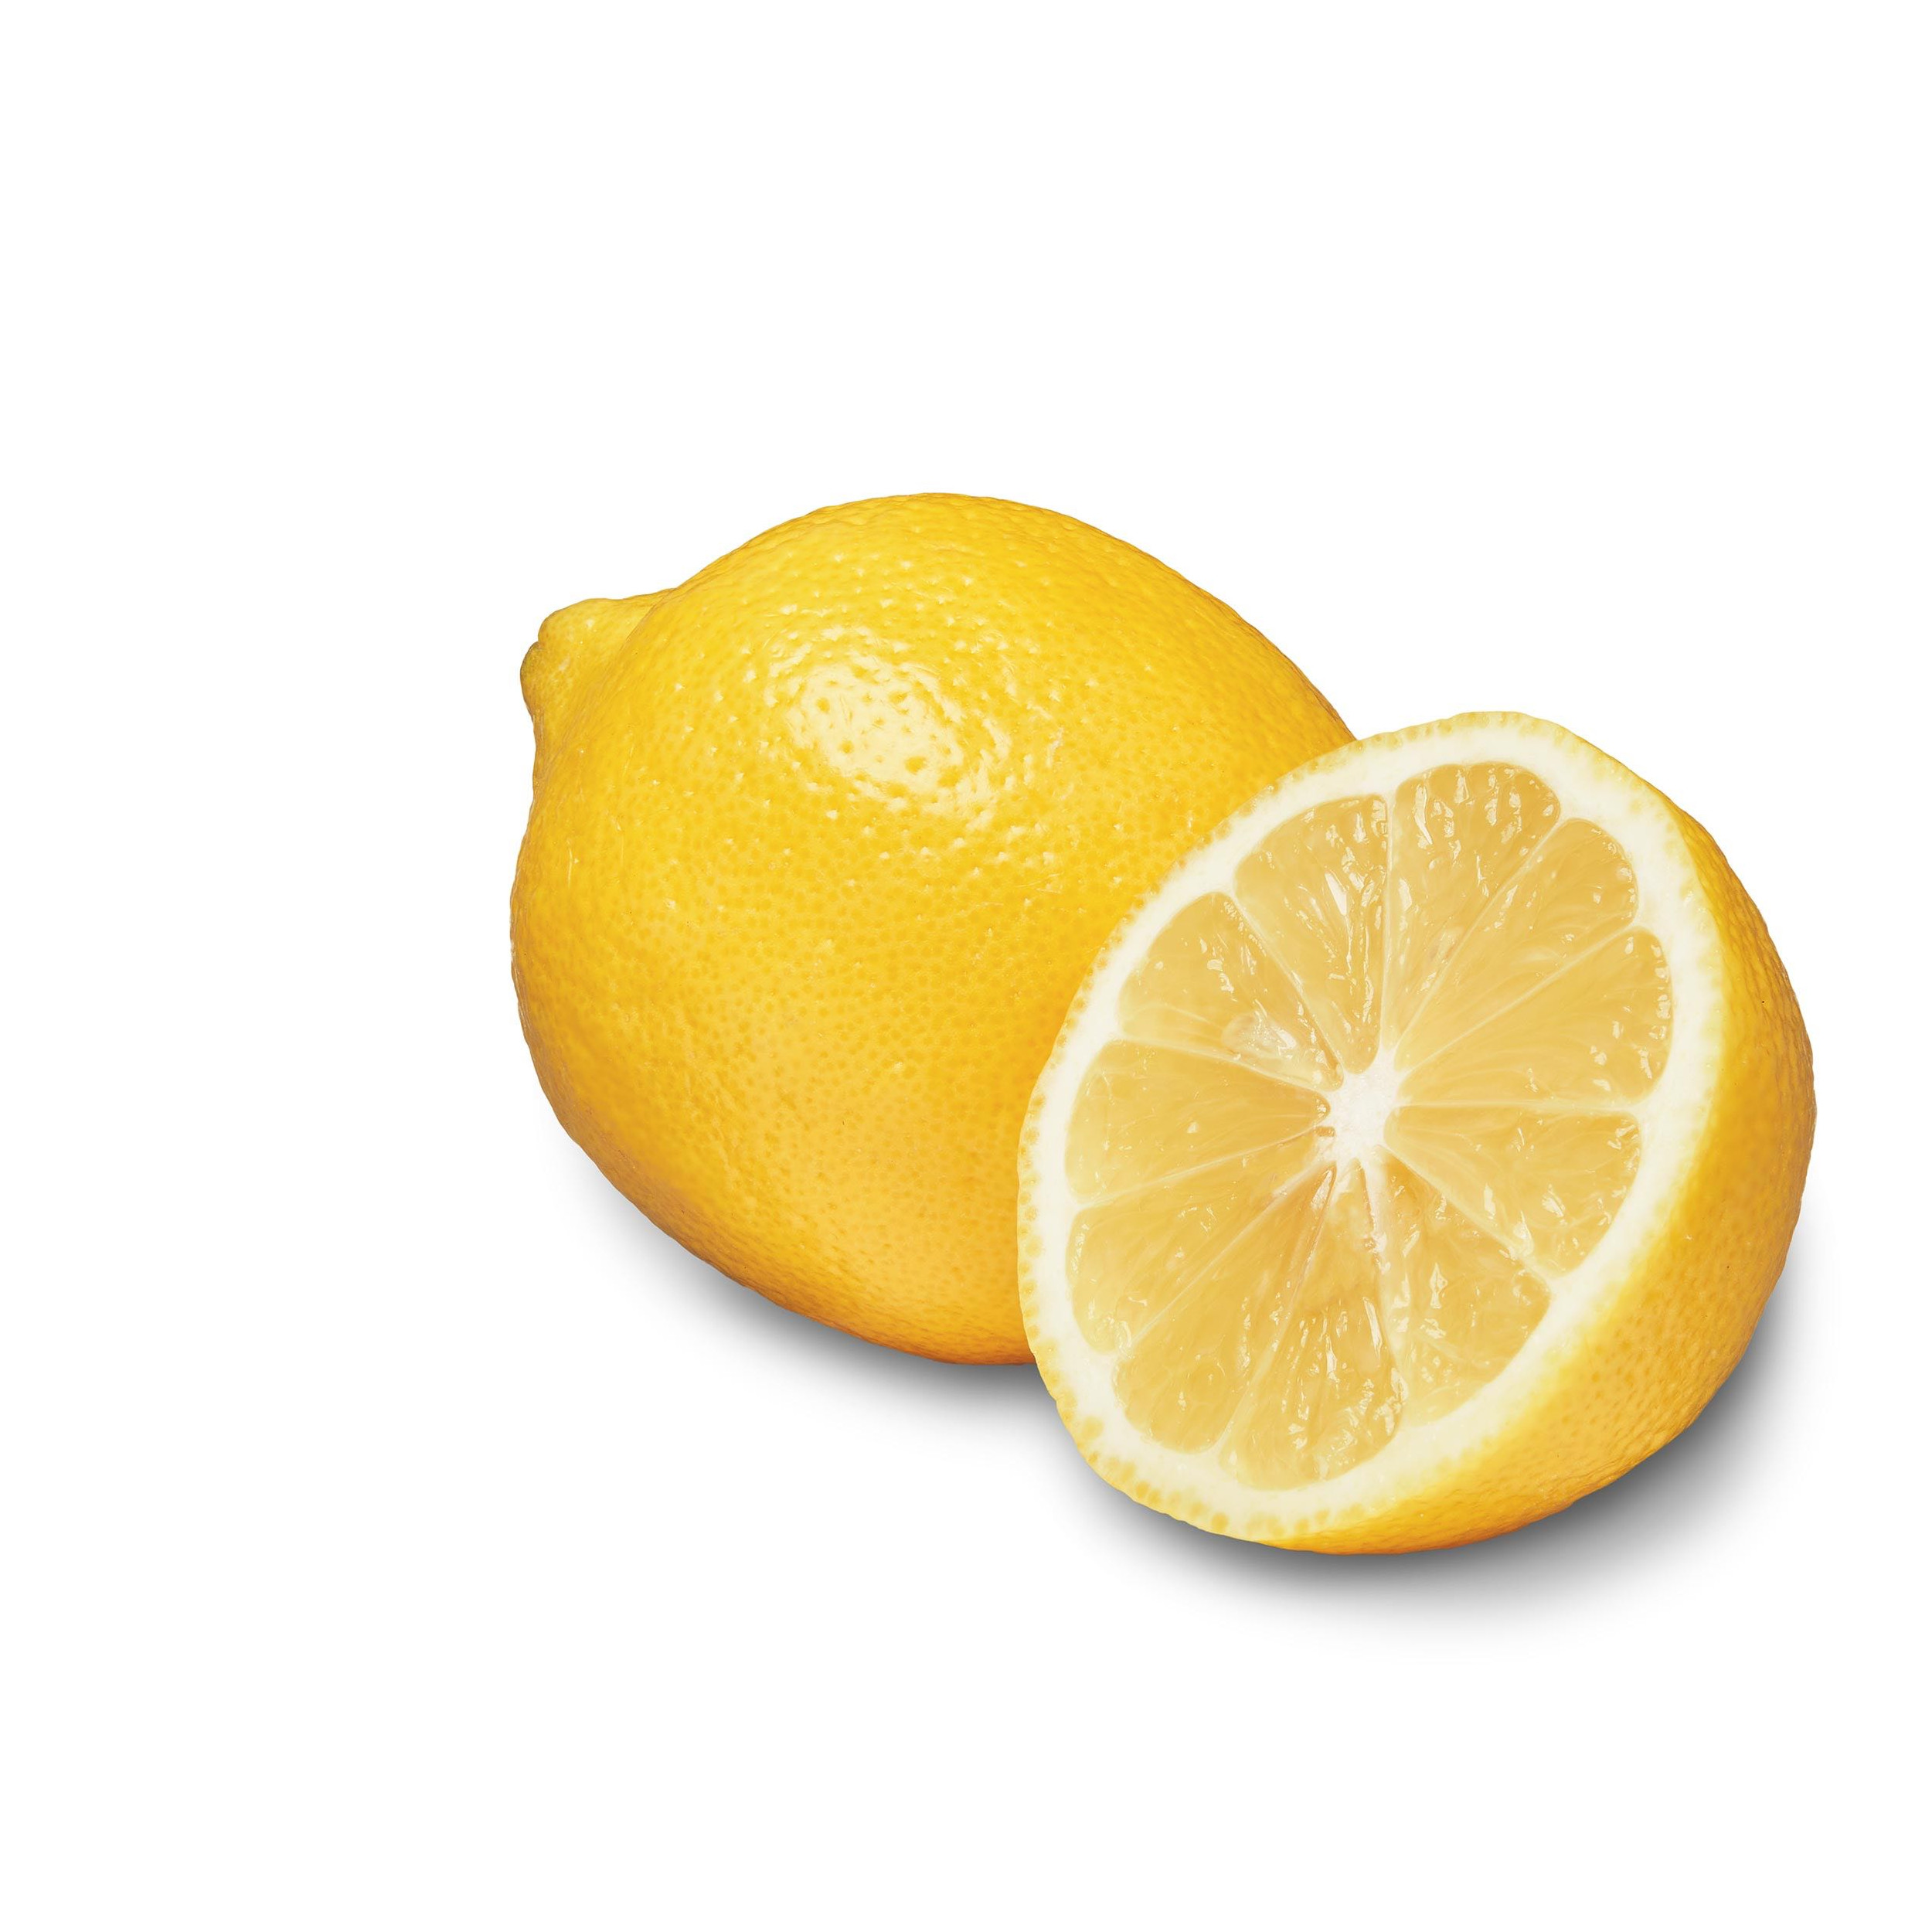
</div>

Edited with orange color:
<div>
    <!--<img src="resources/oranges/1/orange_centered_padded.jpg" width="300px"/>-->
    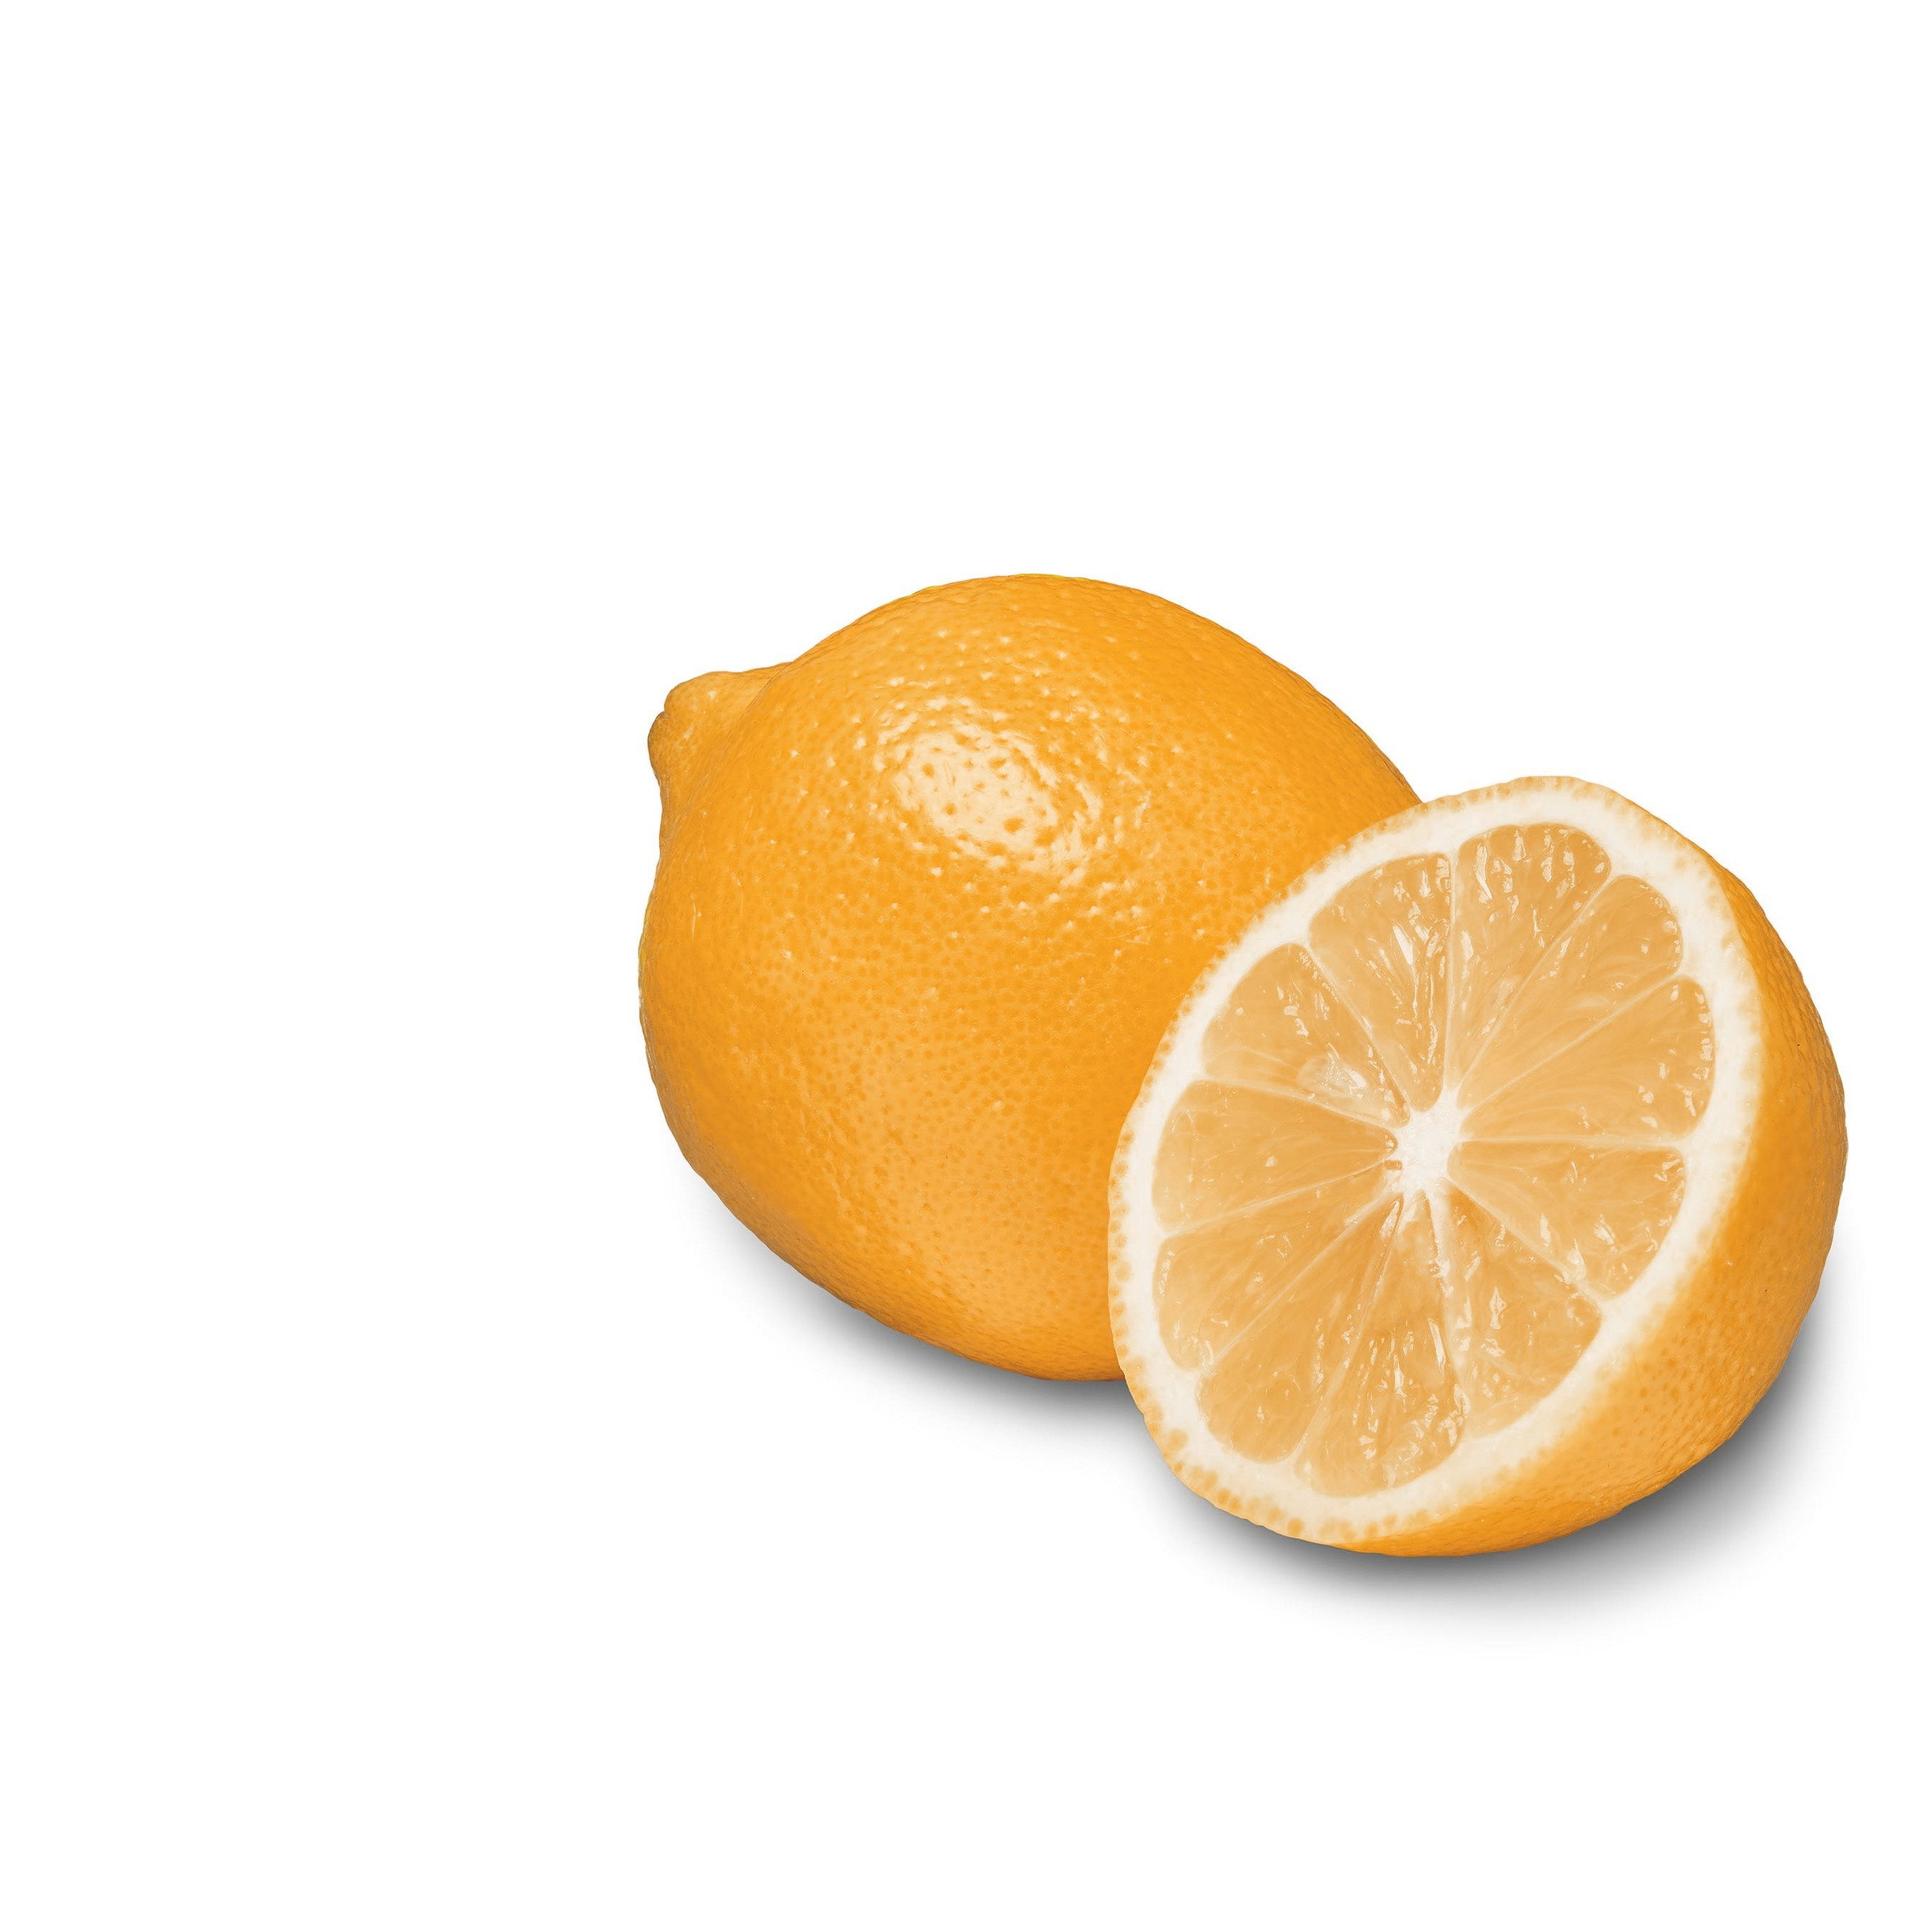
</div>

#### Results
The pre-trained network rarely (~10%) misclassified the lemon as an orange. This suggests that the network doesn't rely too heavily on color data for this example. 

It's interesting that the neural net classifier doesn't rely heavily on color in a situation where many humans would rely on heavily on color.

### Experiment 1.3
Use data from experiment 1.1 to train a neural network.

In this experiment, a pre-trained ResNet is used, with only the last layer being trainable.

#### 1.3.1 and 1.3.2
Two sub-experiments were done. 

- 1.3.1, allow all parameters to be trained (this was by mistake)
- 1.3.2, fix all parameters except the last layer

#### Result
Classification accuracy reached ~90%. A low classification accuracy would have been interesting. 

### Experiment 1.4
In this experiment, we repeat experiment 1.3, but chop off the end of the network (classification side) to expose 512x7x7 activations. Experiment 1.3 used the standard 512x1x1
activations outputted from ResNet.

#### Result
The network had a lower (\~70%) classification rate. There is only 3 classes to classify from, and one class is predominant (\~60%), so 70% might be an interesting result in how low it is. 

### Experiment 1.5
Revisits 1.3, but repeats the experiment for a range of circle sizes and positions.

### Experiment 1.6
The same as 1.5, but tries to act as a control by testing red-green color classification.

Comparing 1.5 and 1.6 is some weak positive evidence to suggest that it is harder to detect contextual colors using the activations at the end of the network. 

### Experiment 1.7
Revisits experiment 1.4. Repeats a slightly more simple version of 1.4 for a range of circle sizes.